<a href="https://colab.research.google.com/github/Rajagopalhertzian/Cargame-using-pygame/blob/main/Image_generation_stablediffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Check for GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


Generating image using stable diffusion

ERROR: Could not find a version that satisfies the requirement opencv-pyt (from versions: none)
ERROR: No matching distribution found for opencv-pyt
Using device: cuda
Loading Stable Diffusion v1.4 model...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Model loaded successfully!
Generating image for: 'A magical forest with glowing trees at night'


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at: output_image.png


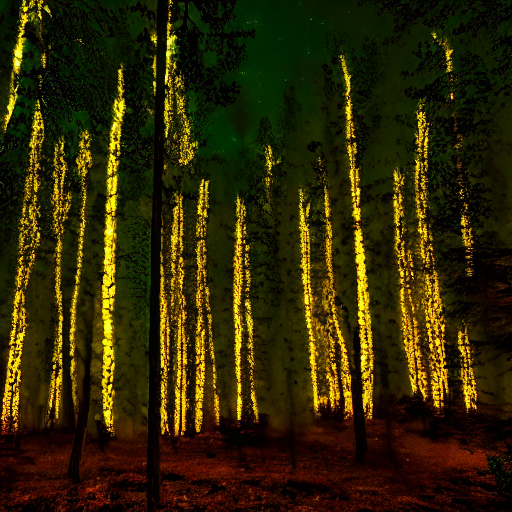

In [ ]:
# Install necessary libraries
!pip install diffusers transformers accelerate torch numpy opencv-pyt
import torch
from diffusers import StableDiffusionPipeline

# Check for GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the Stable Diffusion v1.4 Model (Open Source, No Login Required)
print("Loading Stable Diffusion v1.4 model...")
model_id = "CompVis/stable-diffusion-v1-4"

try:
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16 if device == "cuda" else torch.float32)
    pipe.to(device)
    print("Model loaded successfully!")
except Exception as e:
    print(f"Error loading model: {e}")

# Function to generate an image
def generate_image(prompt, save_path="output_image.png"):
    print(f"Generating image for: '{prompt}'")
    image = pipe(prompt).images[0]
    image.save(save_path)
    print(f"Image saved at: {save_path}")
    return image

# Run the image generation
prompt = "A magical forest with glowing trees at night"
image = generate_image(prompt)

# Display the generated image
from IPython.display import Image, display
display(Image("output_image.png"))

In [ ]:
# Install required libraries
!pip install diffusers transformers accelerate torch numpy opencv-python
!pip install huggingface_hub sentencepiece safetensors
!pip install git+https://github.com/facebookresearch/segment-anything.git
!pip install git+https://github.com/huggingface/optimum.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-ikslg3yb
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-ikslg3yb
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/huggingface/optimum.git to /tmp/pip-req-build-7ueg8dd5
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/optimum.git /tmp/pip-req-build-7ueg8dd5
  Resolved https://github.com/huggingface/optimum.git to commit 4daa40896f693649e21696c509cd98c7e0c40e3c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
import numpy as np
import cv2
from PIL import Image
import requests
from io import BytesIO

Using device: cuda
Loading Stable Diffusion v1.4 model for text-to-image...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Text-to-Image model loaded successfully!
Loading Stable Diffusion Inpainting model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Inpainting model loaded successfully!
Generating image for prompt: 'A magical forest with glowing trees at night'


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved at: generated_image.png
Creating a synthetic mask (simple black-white mask)...
Mask saved at: mask_image.png
Loading original image and mask...
Replacing background with: 'A beautiful beach with sunset'


  0%|          | 0/50 [00:00<?, ?it/s]

Background changed image saved at: background_changed_image.png
Displaying the original and background-changed images:


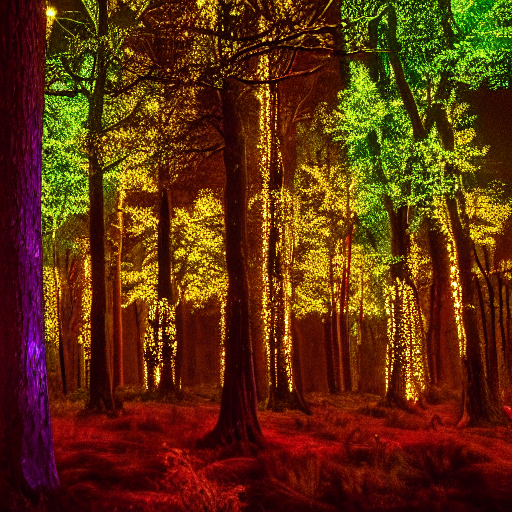

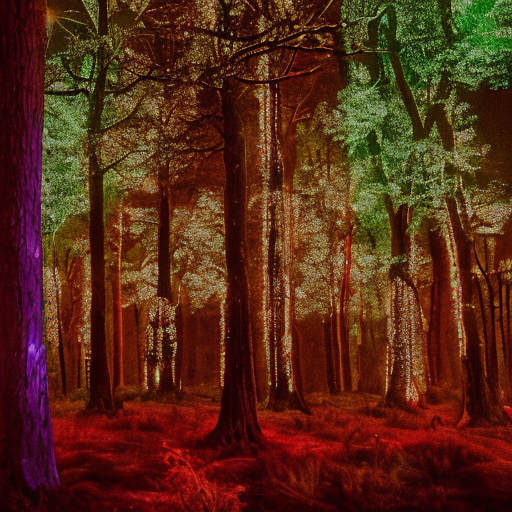

In [ ]:
# Install necessary libraries
!pip install diffusers transformers accelerate torch numpy opencv-python
!pip install pillow

# Import libraries
import torch
from diffusers import StableDiffusionPipeline, StableDiffusionInpaintPipeline
from PIL import Image
import numpy as np
from IPython.display import Image as IPImage, display

# Check for GPU availability
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load Stable Diffusion v1.4 Model
print("Loading Stable Diffusion v1.4 model for text-to-image...")
model_id = "CompVis/stable-diffusion-v1-4"
try:
    pipe = StableDiffusionPipeline.from_pretrained(
        model_id, torch_dtype=torch.float16 if device == "cuda" else torch.float32
    )
    pipe.to(device)
    print("Text-to-Image model loaded successfully!")
except Exception as e:
    print(f"Error loading text-to-image model: {e}")

# Load Stable Diffusion Inpainting Model
print("Loading Stable Diffusion Inpainting model...")
inpaint_model_id = "stabilityai/stable-diffusion-2-inpainting"
try:
    inpaint_pipe = StableDiffusionInpaintPipeline.from_pretrained(
        inpaint_model_id, torch_dtype=torch.float16 if device == "cuda" else torch.float32
    )
    inpaint_pipe.to(device)
    print("Inpainting model loaded successfully!")
except Exception as e:
    print(f"Error loading inpainting model: {e}")

# Step 1: Generate an Image from Text
def generate_image(prompt, save_path="generated_image.png"):
    print(f"Generating image for prompt: '{prompt}'")
    image = pipe(prompt).images[0]
    image.save(save_path)
    print(f"Image saved at: {save_path}")
    return image

# Step 2: Replace the Background
def replace_background(original_image_path, mask_path, inpaint_prompt, save_path="background_changed_image.png"):
    print("Loading original image and mask...")
    original_image = Image.open(original_image_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")  # Binary mask (black/white)

    print(f"Replacing background with: '{inpaint_prompt}'")
    result = inpaint_pipe(prompt=inpaint_prompt, image=original_image, mask_image=mask).images[0]
    result.save(save_path)
    print(f"Background changed image saved at: {save_path}")
    return result

# Step 3: Create a Mask Automatically (Simple Placeholder)
def create_synthetic_mask(image_path, mask_save_path="mask_image.png"):
    print("Creating a synthetic mask (simple black-white mask)...")
    image = Image.open(image_path).convert("L")
    np_image = np.array(image)

    # Generate a simple binary mask by thresholding
    mask = np.where(np_image > 128, 255, 0).astype(np.uint8)
    mask_image = Image.fromarray(mask)
    mask_image.save(mask_save_path)
    print(f"Mask saved at: {mask_save_path}")
    return mask_image

# User Inputs
prompt = "A magical forest with glowing trees at night"
background_prompt = "A beautiful beach with sunset"

# Step 1: Generate the Image
generated_image_path = "generated_image.png"
generated_image = generate_image(prompt, save_path=generated_image_path)

# Step 2: Create a Simple Mask (You can replace this with a custom mask)
mask_path = "mask_image.png"
mask_image = create_synthetic_mask(generated_image_path, mask_save_path=mask_path)

# Step 3: Replace the Background
background_changed_image_path = "background_changed_image.png"
background_changed_image = replace_background(
    generated_image_path, mask_path, background_prompt, save_path=background_changed_image_path
)

# Step 4: Display Both Images
print("Displaying the original and background-changed images:")
display(IPImage(generated_image_path), IPImage(background_changed_image_path))